In [1]:
import numpy as np
import yfinance as yf
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stock = "INFY"
data = yf.download(stock)
close_prices = data['Close'].values
dates= data.index

[*********************100%***********************]  1 of 1 completed


In [3]:
#Calculating SMA
sma_period = 90 
sma = np.convolve(close_prices, np.ones(sma_period)/sma_period, mode='valid')
sma_dates = dates[sma_period-1:] 

In [4]:
#Calculating EMA

ema = np.zeros_like(close_prices)
ema_period = 90
ema[ema_period-1] = np.mean(close_prices[:ema_period])  

smoothing_factor = 2 / (ema_period + 1)

for i in range(ema_period, len(close_prices)):
    ema[i] = close_prices[i] * smoothing_factor + ema[i-1] * (1 - smoothing_factor)

ema_dates = dates

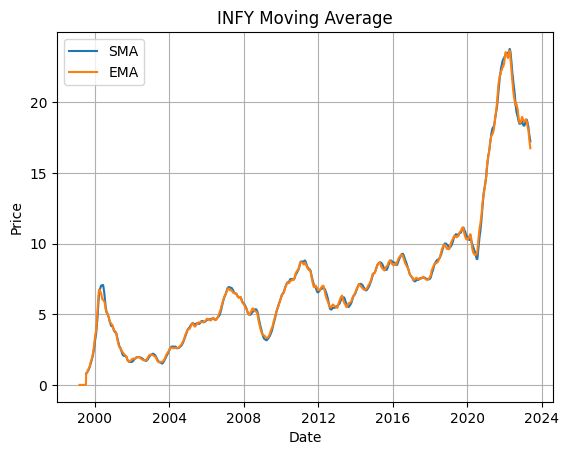

In [5]:
plt.plot(sma_dates, sma, label='SMA')
plt.plot(ema_dates, ema, label='EMA')
plt.title(f'INFY Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()